# Assignment 1: Approximation of mathematical functions

In [2]:
import math
import numpy
from decimal import *
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Approximating $\log$

Function $\log$ is defined on positive real numbers: $\log(x): \mathcal{R}^+ \rightarrow \mathcal{R}$. The Taylor series for $\log$ has [the following form](https://en.wikipedia.org/wiki/Logarithm):

\begin{align}\log (x)  &= \frac{(x-1)^1}{1} - \frac{(x-1)^2}{2} + \frac{(x-1)^3}{3} - \frac{(x-1)^4}{4} + \cdots \\
&= \sum_{k=1}^\infty (-1)^{k+1}\frac{(x-1)^k}{k}
\end{align}

and converges to $\log$ for $0 < x < 2$. 

1. Implement `log1` that approximates $\log(x),\,0 < x < 2$. 
2. Plot  `math.log` and `log1` for $0.5 < x < 5$. 
   * What is the maximum _absolute_ error of `log1` compared to `math.log` on $0.5 < x < 5$?
     Compute and show on the plot.
   * What is the maximum _relative_ error of `log1` compared to `math.log` on $0.5 < x < 5$?
     Compute and show on the plot.
3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.
4. Plot `math.log` and `log2` for $0.5 < x < 50$.
   * What is the maximum _absolute_ error of `log2` compared to `math.log` on $0.5 < x < 50$?
     Compute and show on the plot.
   * What is the maximum _relative_ error of `log2` compared to `math.log` on $0.5 < x < 50$?
     Compute and show on the plot.
5. What are the maximum absolute and relative errors of `log1` and  `log2` on interval $0.5 < x < 2$? 


n	x	log	~log1	err
1	0.6	-0.511	-0.400	0.111
1	1.5	0.405	0.500	0.095
1	2	0.693	1.000	0.307
1	4.9	1.589	3.900	2.311
-----------------------------------------------------
2	0.6	-0.511	-0.480	0.031
2	1.5	0.405	0.375	0.030
2	2	0.693	0.500	0.193
2	4.9	1.589	-3.705	5.294
-----------------------------------------------------
4	0.6	-0.511	-0.508	0.003
4	1.5	0.405	0.401	0.004
4	2	0.693	0.583	0.110
4	4.9	1.589	-41.768	43.357
-----------------------------------------------------
8	0.6	-0.511	-0.511	0.000
8	1.5	0.405	0.405	0.000
8	2	0.693	0.635	0.059
8	4.9	1.589	-5177.346	5178.935
-----------------------------------------------------
absolute error in x=4.99999, error value: 6377.440271853986
relative error in x=4.99999, error value: 3962.5264339702294




n	x	log	~log2	err
1	0.6	-0.511	-0.400	0.111
1	9.6	2.262	2.299	0.037
1	19.5	2.970	2.971	0.000
1	26.7	3.285	3.329	0.045
1	32.9	3.493	3.638	0.145
1	49.9	3.910	3.914	0.004
-----------------------------------------------------
2	0.6	-0.511	-0.480	0.03

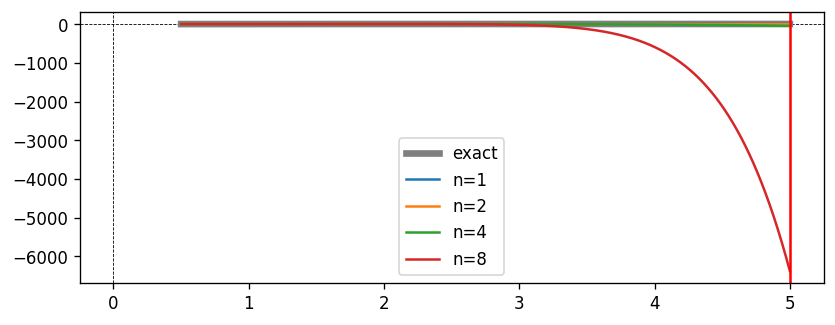

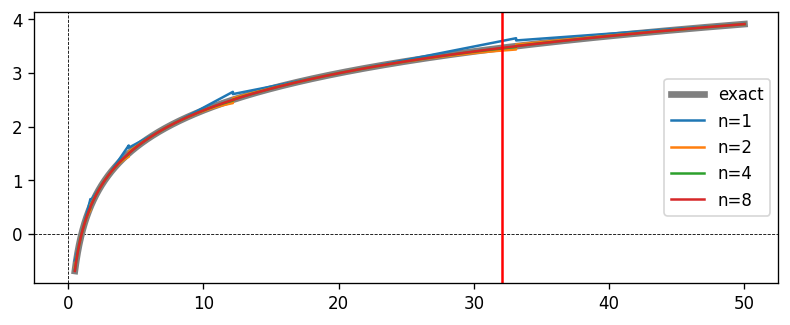

In [3]:
e = 2.7182818284590455
# We could also compute e = exp(1, 20), but in general
# constants are hard-coded

def log1(x, k):
  val = 0
  sign = 1
  s = 1
  for i in range(1, k+1):
    s = s * (x-1) 
    val = val + ((sign * s)/i)
    sign = -1*sign

  return val

def log2(x,k):
  n = 0
  while (x>math.sqrt(e)):
    x = x / e
    n = n + 1
  return (n + log1(x,k))

def plot_fun(f, g, min, max, logn_from=0, logn_till=4):
  """Plots approximate function f with a finite number of terms of Taylor
  series, and accurate function g for a range of arguments between min and max.
  f is plotted for numbers of Taylor series terms ranging exponentially from
  2**logn_from to 2**(logn_till-1), inclusive.
  Arguments:
     f - approximate function f(x, n) computing the value at x using n terms
        of Taylor series.
     g - accurate (practically exact) function g(x).
     min - minimum value of the range of arguments.
     max - maximum value of the range of arguments.
     logn_from - the smallest number of Taylor series terms is 2**logn_from.
     logn_till - the largets number of Taylor series terms is 2**(logn_till-1).
  """
  # Create a vector of 10000 values equally spaced between min and max.
  x=numpy.linspace(min, max, 10000)
  # Prepare a canvas for the graph.
  plt.figure(figsize=(8, 3)).set_dpi(120)
  # Plot axes x=0 and y=0, dashed.
  plt.axhline(0, ls='--', c='black', lw=0.5)
  plt.axvline(0, ls='--', c='black', lw=0.5)
  # Plot the 'exact' function.
  plt.plot(x, g(x), label="exact", c='gray', lw=4)
  # For each number of Taylor series terms ...
  for logn in range(logn_from, logn_till):
      n = 2**logn
      y = [f(x_, n) for x_ in x]
      # Plot the Taylor approximation
      plt.plot(x, y, label=f"n={n}")
  # Display the legend
  plt.legend()

print("n\tx\tlog\t~log1\terr\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [0.6, 1.5, 2, 4.9]:
    me = numpy.log(x)
    l = log1(x, n)
    print(f"{n}\t{x}\t{me:.3f}\t{l:.3f}\t{abs(me - l):.3f}")
  print("-----------------------------------------------------")


print("absolute error in x=4.99999, error value:",abs(math.log(4.99999) - log1(4.99999,8))) #absolute error
print("relative error in x=4.99999, error value:",abs(math.log(4.99999) - log1(4.99999,8)) / math.log(5)) #relative error
plot_fun(log1, numpy.log, min=0.5, max=5)
plt.axvline(x=4.99999, ymin=math.log(4.99999), ymax=log1(4.99999,8) , color = 'r')


print("\n\n\n")

print("n\tx\tlog\t~log2\terr\n=====================================================")
for logn in range(4):
  n = 2**logn
  for x in [0.6,9.6, 19.5, 26.7, 32.9, 49.9]:
    me = numpy.log(x)
    l = log2(x,n)
    print(f"{n}\t{x}\t{me:.3f}\t{l:.3f}\t{abs(me - l):.3f}")
  print("-----------------------------------------------------")


print("absolute error in x=32.1, error:",abs(math.log(32.1) - log2(32.1,8))) #absolute error
print("relative error in x=32.1, error:",abs(math.log(32.1) - log2(32.1,8)) / math.log(32.1)) #relative error
plot_fun(log2, numpy.log, min=0.5, max=50)
plt.axvline(x=32.1, ymin=math.log(32.1), ymax=log1(32.1,8) , color = 'r')




print("\n\n\n")

print("n\tx\tlog\t~log1\t~log2\terr\terr2\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [0.6, 1.2, 1.6, 1.9]:
    me = numpy.log(x)
    l = log1(x, n)
    l2 = log2(x, n)
    print(f"{n}\t{x}\t{me:.3f}\t{l:.3f}\t{l2:.3f}\t{abs(me - l):.3f}\t{abs(me - l2):.3f}")
  print("-----------------------------------------------------")
print("for log1:")
print("maximum absolute error is on x=1.999 , n=1, error value:",abs(math.log(1.999) - log1(1.999,1)))
print("maximum relative error is on x=1.999 , n=1, error value:",abs(math.log(1.999) - log1(1.999,1)) / math.log(1.999))

print("for log2:")
print("maximum absolute error is on x=1.999 , n=1, error value:",abs(math.log(1.999) - log2(1.999,1)))
print("maximum relative error is on x=1.999 , n=1, error value:",abs(math.log(1.999) - log2(1.999,1)) / math.log(1.999))



print("\n\n\n")


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement approximate computation of the number of subsets of a set (functions `logfact` and `binom` in the [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF).
2. Compute `binom(1, 1)`, `binom(4, 3)`, and `binom(1000, 10)`. Compare the running times of `binom` using `log2` and `exp2` vs. `math.log` and `math.exp`.
3. What are the absolute and relative error of `binom` for each combination of arguments — `(1,1)`, `(4, 3)`, `(1000, 10)`?
4. How many Taylor series terms (argument `n` in `log2`, `exp2`) are required to get error of 0.01% for `binom(1000, 10)`?
5. How do the error and the running time change if instead of `log2` and `exp2` you use:
   * `log2` and `math.exp`? 
   * `math.log` and `exp2`?

In [4]:
e = 2.7182818284590455
# We could also compute e = exp(1, 20), but in general
# constants are hard-coded

def exp(x, n):
    """Computes exp(x) with Taylor series approximation upto x^n.
    Returns the approximate value.
    """
    v = 1       # initialize the value to the first term of Taylor series
    xi = x      # initialize the ith power of x to x
    fact = 1    # initialize fact to 0!
    for i in range(1, n+1):
        fact *= i       # compute i!
        v += xi/fact    # add a term to the Taylor series
        xi *= x         # compute the next power of x
    return v    # return the result

def exp2(x, n):
  v = 1
  if x > 1:
    pow = int(x)   # compute the entire part of x
    v *= e**pow    # exponentiate the entire part efficiently
    x -= pow       # keep only the fractional part of x
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   # multiply the value by the approximate exponent
                   # of the fractional part
  return v

#functions logfact and binom in the lecture 1 notebook.
def fact(n):
  fct = 1
  for i in range(n):
    fct *= i+1
  return fct

def comb(n, k):
  return fact(n)//(fact(k)*fact(n - k))

def logfact(n):
  logf = 0
  for i in range(n):
    logf += math.log(i + 1)
  return logf

def binom(n, k):
  return round(math.exp(logfact(n) - logfact(k) - logfact(n - k)))


#editing the function from lecture 1 and use them with log2 function and exp2 function
#taylor_series_terms_number = 8
def logfact2(n,taylor_series_terms_number):
  logf = 0
  for i in range(n):
    logf += log2(i + 1,taylor_series_terms_number)
  return logf

def binom2(n, k,taylor_series_terms_number):
  return round(exp2(logfact2(n,taylor_series_terms_number) - logfact2(k,taylor_series_terms_number) - logfact2(n - k,taylor_series_terms_number),taylor_series_terms_number))

print("binom2 : this function uses log2 and exp2 functions")

print("binom(1,1) , binom2(1,1) running time:")
%time print("binom(1,1) = %d" % binom(1, 1))
%time print("binom2(1,1) = %d" % binom2(1, 1,8))
print()

print("binom(4,3) , binom2(4,3) running time:") 
%time print("binom(4,3) = %d" % binom(4,3)) 
%time print("binom2(4,3) = %d" % binom2(4,3,8))
print()

print("binom(1000,10) , binom2(1000,10) running time:") 
%time print("binom(1000,10) = %d" % binom(1000,10)) 
%time print("binom2(1000,10) = %d" % binom2(1000,10,8))
print()


print("n\tx\tbinom\t~binom2\terr\terror%\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [[1,1], [4,3], [1000,10]]:
    me = binom(x[0],x[1])
    b = binom2(x[0],x[1], n)
    print(f"{n}\t{x}\t{me:.3f}\t{b:.3f}\t{abs(me - b):.3f}\t{abs(me - b)/me * 100:.3f}%")
  print("-----------------------------------------------------")

print("maximum absolute error and maximum relative error in binom2(1,1)")
print("maximum absolute error is on (1,1) , n=1, error value:",abs(binom(1,1)- binom2(1,1,8)))
print("maximum relative error is on (1,1) , n=1, error value:",abs(binom(1,1) - binom2(1,1,8)) /binom(1,1))
print("\n")
print("maximum absolute error and maximum relative error in binom2(4,3)")
print("maximum absolute error is on (4,3) , n=1, error value:",abs(binom(4,3)- binom2(4,3,8)))
print("maximum relative error is on (4,3) , n=1, error value:",abs(binom(4,3) - binom2(4,3,8)) /binom(4,3))
print("\n")

print("maximum absolute error and maximum relative error in binom2(1000,10)")
print("maximum absolute error is on (1000,10) , n=1, error value:",abs(binom(1000,10)- binom2(1000,10,8)))
print("maximum relative error is on (1000,10) , n=1, error value:",abs(binom(1000,10) - binom2(1000,10,8)) /binom(1000,10))


print("\n\n\n")

# print here what n number is needed to get 0.01% error percentage
print("8 Taylor series terms (argument n in log2, exp2) are required to get error of 0.009% ~ 0.01% for binom(1000, 10)")
print("\n\n")


def binom3(n, k,taylor_series_terms_number):
  return round(math.exp(logfact2(n,taylor_series_terms_number) - logfact2(k,taylor_series_terms_number) - logfact2(n - k,taylor_series_terms_number)))
def binom4(n, k,taylor_series_terms_number):
  return round(exp2(logfact(n) - logfact(k) - logfact(n - k),taylor_series_terms_number))

print("binom3 : this function uses log2 and math.exp functions")
print("binom4 : this function uses math.log and exp2 functions")
print("\n\n\n")
print("binom3(1,1) , binom4(1,1) running time:")
%time print("binom3(1,1) = %d" % binom3(1, 1,8))
%time print("binom4(1,1) = %d" % binom4(1, 1,8))
%time print("binom(1,1) = %d" % binom(1, 1))
print()

print("binom3(4,3) , binom4(4,3) running time:") 
%time print("binom3(4,3) = %d" % binom3(4,3,8)) 
%time print("binom4(4,3) = %d" % binom4(4,3,8))
%time print("binom(4,3) = %d" % binom(4, 3))
print()

print("binom3(1000,10) , binom4(1000,10) running time:") 
%time print("binom3(1000,10) = %d" % binom3(1000,10,8)) 
%time print("binom4(1000,10) = %d" % binom4(1000,10,8))
%time print("binom(1000,10) = %d" % binom(1000, 10))
print("\n\n\n")

print("n\tx\tbinom\t~binom3\t~binom4\terr\terr2\n=====================================================")
for  logn in range(4):
  n = 2**logn
  for x in [[1,1], [4,3], [1000,10]]:
    me = binom(x[0],x[1])
    b3 = binom3(x[0],x[1], n)
    b4 = binom4(x[0],x[1], n)
    print(f"{n}\t{x}\t{me:.3f}\t{b:.3f}\t{b3:.3f}\t{b4:.3f}\t{abs(me - b3):.3f}\t")
  print("-----------------------------------------------------")

print("\n")
print("maximum absolute and maximum relative error in binom3:\n")
print("maximum absolute error and maximum relative error in binom3(1,1)")
print("maximum absolute error is on (1,1) , n=1, error value:",abs(binom(1,1)- binom3(1,1,8)))
print("maximum relative error is on (1,1) , n=1, error value:",abs(binom(1,1) - binom3(1,1,8)) /binom(1,1))
print("\n")
print("maximum absolute error and maximum relative error in binom3(4,3)")
print("maximum absolute error is on (4,3) , n=1, error value:",abs(binom(4,3)- binom3(4,3,8)))
print("maximum relative error is on (4,3) , n=1, error value:",abs(binom(4,3) - binom3(4,3,8)) /binom(4,3))
print("\n")

print("maximum absolute error and maximum relative error in binom3(1000,10)")
print("maximum absolute error is on (1000,10) , n=1, error value:",abs(binom(1000,10)- binom3(1000,10,8)))
print("maximum relative error is on (1000,10) , n=1, error value:",abs(binom(1000,10) - binom3(1000,10,8)) /binom(1000,10))


print("\n")
print("maximum absolute and maximum relative error in binom4:\n")
print("maximum absolute error and maximum relative error in binom4(1,1)")
print("maximum absolute error is on (1,1) , n=1, error value:",abs(binom(1,1)- binom4(1,1,8)))
print("maximum relative error is on (1,1) , n=1, error value:",abs(binom(1,1) - binom4(1,1,8)) /binom(1,1))
print("\n")
print("maximum absolute error and maximum relative error in binom4(4,3)")
print("maximum absolute error is on (4,3) , n=1, error value:",abs(binom(4,3)- binom4(4,3,8)))
print("maximum relative error is on (4,3) , n=1, error value:",abs(binom(4,3) - binom4(4,3,8)) /binom(4,3))
print("\n")

print("maximum absolute error and maximum relative error in binom4(1000,10)")
print("maximum absolute error is on (1000,10) , n=1, error value:",abs(binom(1000,10)- binom4(1000,10,8)))
print("maximum relative error is on (1000,10) , n=1, error value:",abs(binom(1000,10) - binom4(1000,10,8)) /binom(1000,10))


binom2 : this function uses log2 and exp2 functions
binom(1,1) , binom2(1,1) running time:
binom(1,1) = 1
CPU times: user 51 µs, sys: 11 µs, total: 62 µs
Wall time: 64.4 µs
binom2(1,1) = 1
CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 63.9 µs

binom(4,3) , binom2(4,3) running time:
binom(4,3) = 4
CPU times: user 42 µs, sys: 9 µs, total: 51 µs
Wall time: 53.2 µs
binom2(4,3) = 4
CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 77.2 µs

binom(1000,10) , binom2(1000,10) running time:
binom(1000,10) = 263409560461767849541632
CPU times: user 401 µs, sys: 6 µs, total: 407 µs
Wall time: 411 µs
binom2(1000,10) = 263433182503208340160512
CPU times: user 6.15 ms, sys: 0 ns, total: 6.15 ms
Wall time: 6.09 ms

n	x	binom	~binom2	err	error%
1	[1, 1]	1.000	1.000	0.000	0.000%
1	[4, 3]	4.000	4.000	0.000	0.000%
1	[1000, 10]	263409560461767849541632.000	174616069824934186057728.000	88793490636833663483904.000	33.709%
-----------------------------------------------------
2	[1, 1]	1.00